In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read data**

In [2]:
visa_df=pd.read_csv('Visadataset.csv')
visa_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Bivarient analysis**
- a
- a

- 

**Cateorigical vs cateogorical**

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**continent-case status**

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [19]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Q1) How many asia people got the visa Certified**    
**How many asia people got the visa Denied**

**Q1) How many asia people got the visa Certified** 

In [20]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])
print(f'length of employees visa certified are: {len(visa_df[con])}')

length of employees visa certified are: 11012


**How many asia people got the visa Denied**

In [21]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Denied')
con=con1&con2
len(visa_df[con])
print(f'length of employees are not visa certified: {len(visa_df[con])}')

length of employees are not visa certified: 5849


In [22]:
unique1=visa_df['continent'].unique()
print(unique1)
un2=visa_df['case_status'].unique()
un2

['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']


array(['Denied', 'Certified'], dtype=object)

In [23]:
#certified
l1=[]
l2=[]
unique1=visa_df['continent'].unique()
for i in unique1:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Certified')
    con1=con1&con2
    ln=len(visa_df[con1])
    l1.append(len(visa_df[con1]))
#print(f'length of employees are not visa certified: {len(visa_df[con])}')
for i in unique1:
    con1=(visa_df['continent']==i)
    con2=(visa_df['case_status']=='Denied')
    con2=con1&con2
    ln=len(visa_df[con2])
    l2.append(len(visa_df[con2]))
print(l2,l1)
#id_values=['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
cols=[ 'Certified','Denied']
pd.DataFrame(zip(l1,l2),index=unique1,columns=cols)

[5849, 154, 1255, 775, 359, 70] [11012, 397, 2037, 2957, 493, 122]


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab, pd.cross_tab**

In [24]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)

**crosstab**
- It takes awo argement
    - first argument: index
    - second argument: order

In [25]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)

In [ ]:
result1.plot(kind='bar')

In [26]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

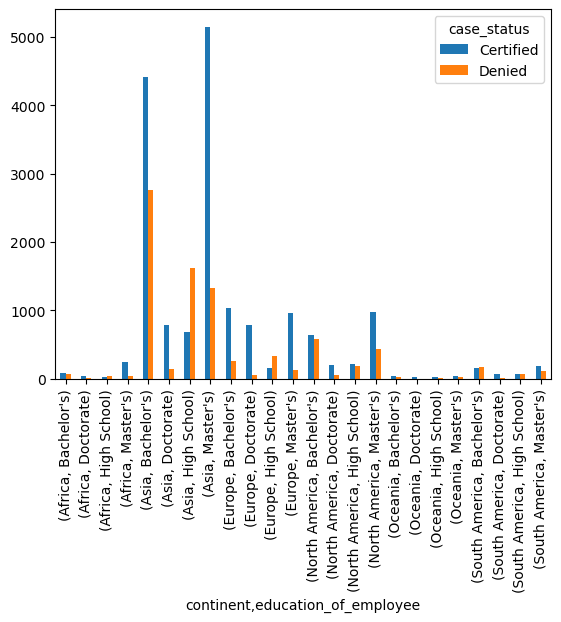

In [27]:
result3.plot(kind='bar')

In [28]:
col1=visa_df['continent']
col2=['education_of_employees']
col3=['case_status']
col=[col1,col2]
result1=pd.crosstab(col,col3)
result1

,col_0,case_status
continent,row_1,
Africa,education_of_employees,551
Asia,education_of_employees,16861
Europe,education_of_employees,3732
North America,education_of_employees,3292
Oceania,education_of_employees,192
South America,education_of_employees,852


**Numerical-Numerical**

- In order to plot numirical vs numerical



$scatter$

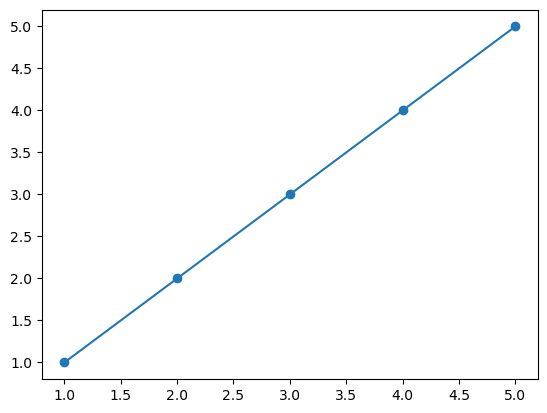

In [29]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# This is x=y graph
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

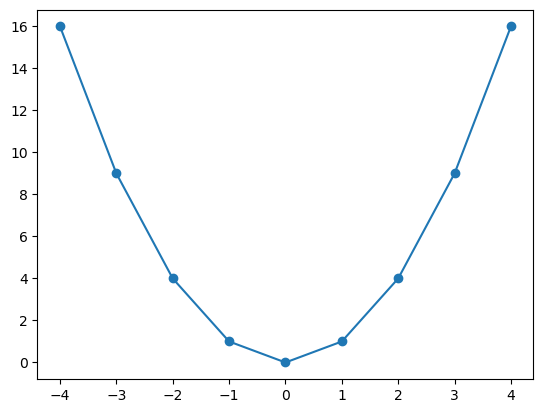

In [30]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

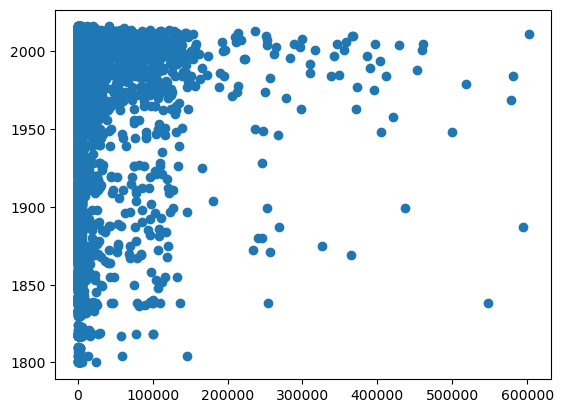

In [31]:
#scatter plot-1
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.scatter(x,y)
#plt.plot(x,y)
plt.show()

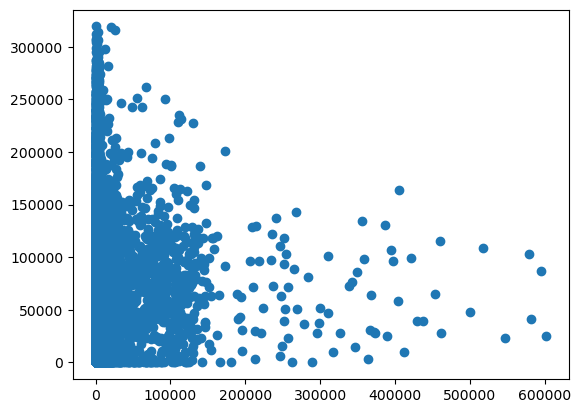

In [32]:
#scatter plot-2
x=visa_df['no_of_employees']
y=visa_df['prevailing_wage']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.scatter(x,y)
#plt.plot(x,y)
plt.show()

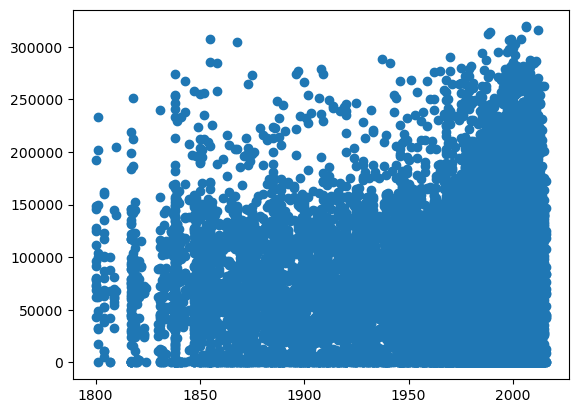

In [33]:
#scatter plot-2
x=visa_df['yr_of_estab']
y=visa_df['prevailing_wage']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.scatter(x,y)
#plt.plot(x,y)
plt.show()

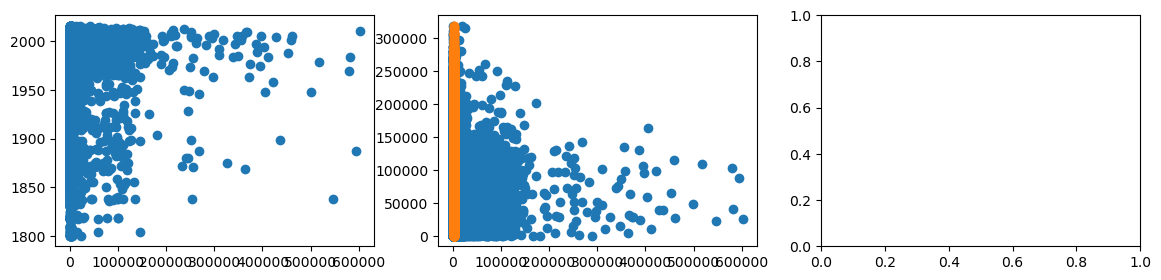

In [34]:
#scatter plot-1
plt.figure(figsize=(14,3))

x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.subplot(1,3,1).scatter(x,y)
#plt.plot(x,y)


#scatter plot-2

x=visa_df['no_of_employees']
y=visa_df['prevailing_wage']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.subplot(1,3,2).scatter(x,y)
#plt.plot(x,y)


#scatter plot-3
plt.subplot(1,3,3)
x=visa_df['yr_of_estab']
y=visa_df['prevailing_wage']
#y=[i*i for i in range(-4,5)]
# This is x=y graph
plt.subplot(1,3,2).scatter(x,y)


**Pearsons corelation**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEp2A_l2XGVWDGnfBpe_4bZ2OmKFTH6zJo0g&amp;s" jsaction="VQAsE" class="sFlh5c pT0Scc" alt="Correlation Coefficient: Simple Definition, Formula, Easy ..." jsname="JuXqh" style="max-width: 827px; width: 350px; height: 183px; margin: 0px;" data-ilt="1717686747794">

- ctr+a
- ctr+c
- ctr+v
- esc+m
- shift enter

- It gives the amount of relation btn varieble
- It is denited with **r**
- r varies from -1 to 1
- For positive relation r gi value 0 to 1
- For negative it gives value -1 to 0
- In this data we have 3 numerical columns
- so we will gate 3*3 = 9 values
- All trace(Digonal) of the matrix represent varience
- All Upper and Lower triangular values are covarience

<Axes: >

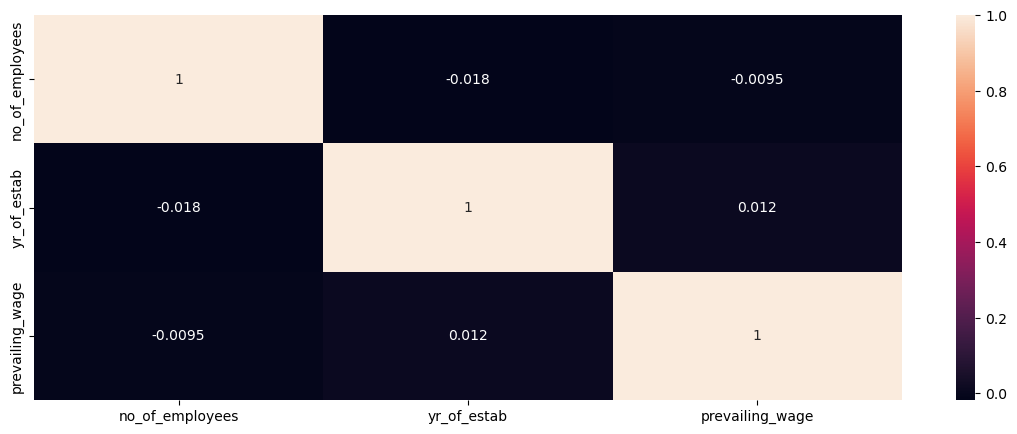

In [36]:
visa_corr=visa_df.corr(numeric_only=True)
plt.figure(figsize=(14,5))
sns.heatmap(visa_corr,
           annot=True)

**Observations**
- The correlations value btn no of employee and yr of establishment is approximetly $zero$
 - which indicatetes no relation

 - The correlations value btn no of employee and prevailing_wage t is approximetly $zero$
   - which indicatetes no relation
- The correlations value btn  prevailing_wage and yr_of_establishment is approximetly $zero$
  - which indicatetes no relation

**What happen if correlation is high**
- for that we read the **winequality_red** data

In [9]:
wine_data=pd.read_csv('winequality_red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
wine_data=wine_data.drop_duplicates()
wine_data=wine_data.iloc[1:,:]  # indexces not in the order

In [11]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
3,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
7,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
11,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0


**indexces not in order**
- get in in order

In [12]:
len(wine_data)

1359

In [13]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 1 to 3197
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   float64
dtypes: float64(12)
memory usage: 138.0 KB


**Corellation**
- 12*12=144

In [15]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


- In this we cant fing which relation is small and large 
- for that one map name as **heat map**
**Heat map**
- It will provide the matrix rep. of correlation value
- It represent the value in color format
- different diff value in different color
- color means like a scale with color
- it is in the **seaborn** package

<Axes: >

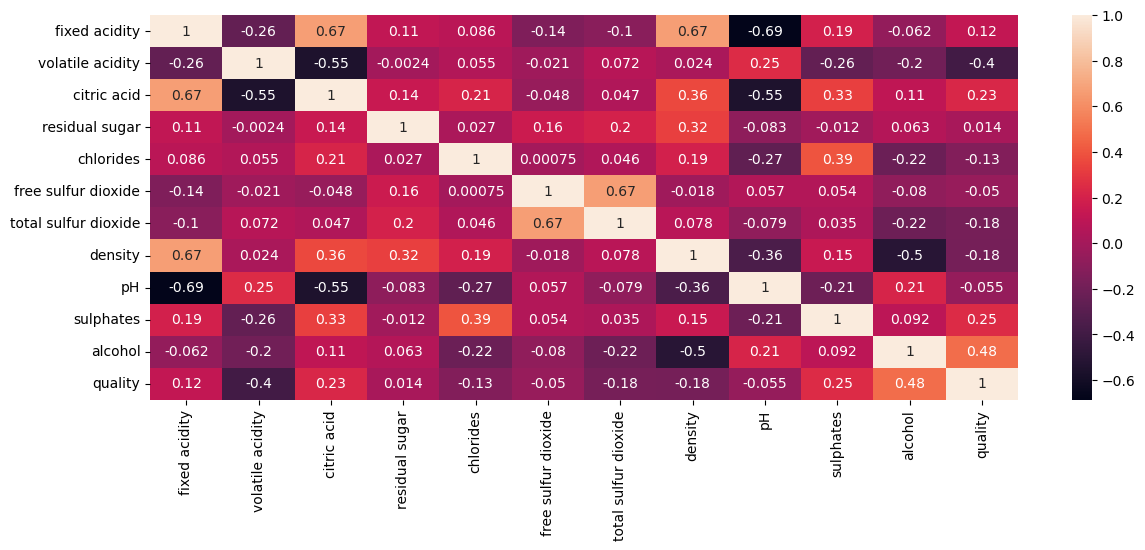

In [18]:
wine_corr=wine_data.corr()
plt.figure(figsize=(14,5))
sns.heatmap(wine_corr,
           annot=True)

In [44]:
# !pip install seaborn --upgrade
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Draw the scatter plot for wine data columns**
- 

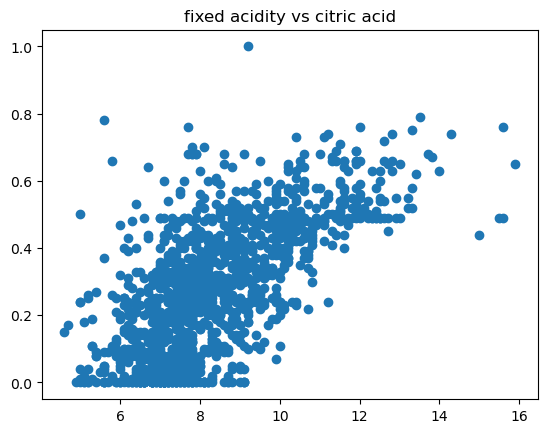

In [43]:
# in above data higest correlation value is 0.67
##fixed_acidity vs citric_acid
plt.title('fixed acidity vs citric acid')
x=wine_data['fixed acidity']
y=wine_data['citric acid']
plt.scatter(x,y)
plt.show()


**fixed acidity vs density**

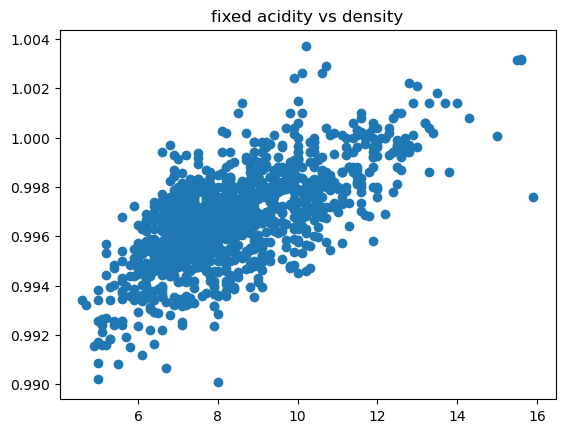

In [47]:
# r= 0.67
plt.title('fixed acidity vs density')
x=wine_data['fixed acidity']
y=wine_data['density']
plt.scatter(x,y)
plt.show()

In [ ]:
**'free sulfur dioxide  vs total sulfur dioxide'

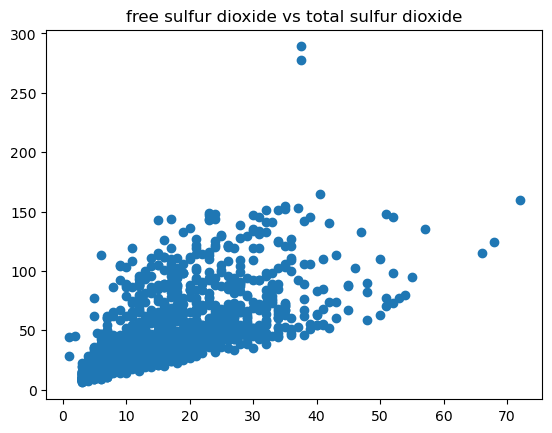

In [48]:
plt.title('free sulfur dioxide vs total sulfur dioxide')
x=wine_data['free sulfur dioxide']
y=wine_data['total sulfur dioxide']
plt.scatter(x,y)
plt.show()

**Subplot of r=positive 0.67**

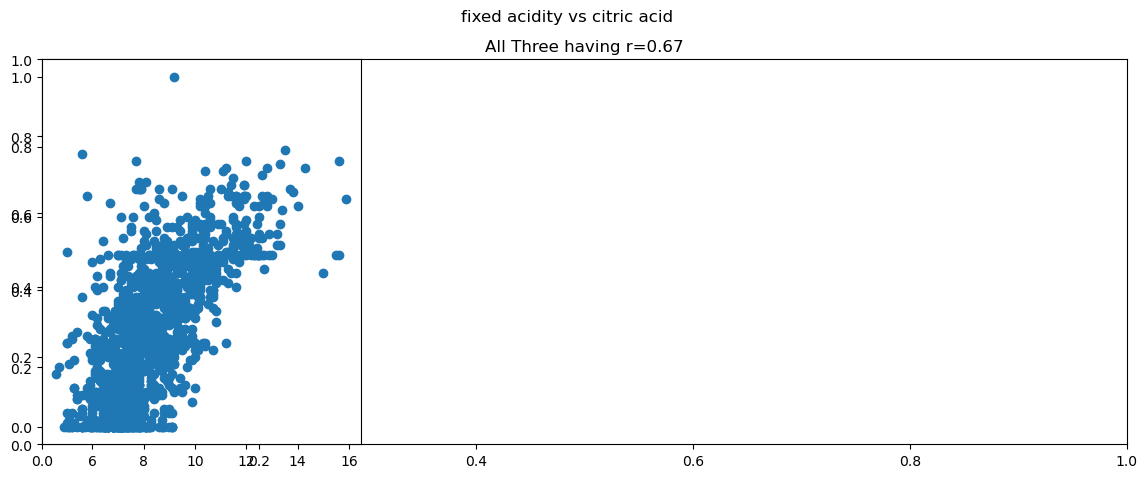

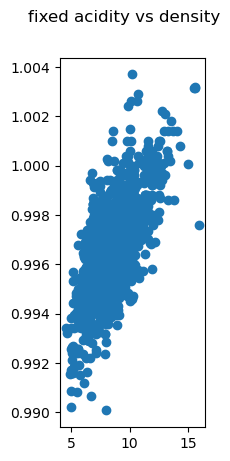

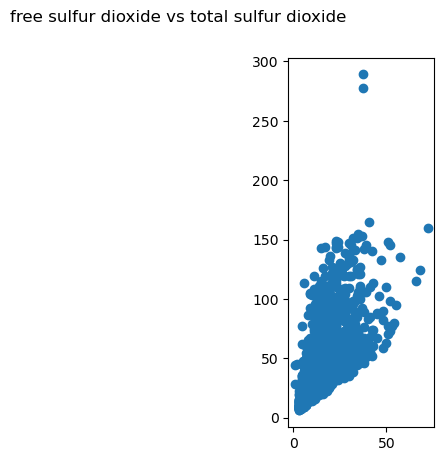

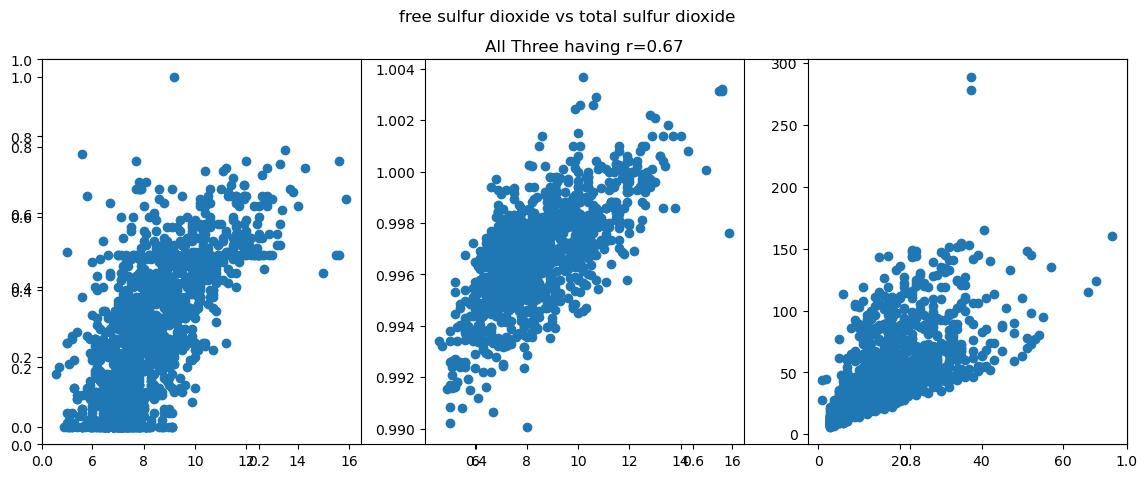

In [54]:

plt.figure(figsize=(14,5))
plt.title('All Three having r=0.67')

plt.suptitle('fixed acidity vs citric acid')
x=wine_data['fixed acidity']
y=wine_data['citric acid']
plt.subplot(1,3,1).scatter(x,y)

###########################################

plt.suptitle('fixed acidity vs density')
x=wine_data['fixed acidity']
y=wine_data['density']
plt.subplot(1,3,2).scatter(x,y)

####################################

plt.suptitle('free sulfur dioxide vs total sulfur dioxide')
x=wine_data['free sulfur dioxide']
y=wine_data['total sulfur dioxide']
plt.subplot(1,3,3).scatter(x,y)
plt.show()